In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

size = 50
end = 5
dt = 0.1


In [79]:
t_steps = np.arange(0, end+dt, 0.1)
t_steps
max_steps = len(t_steps)

In [110]:
print(max_steps)

51


In [21]:
center = [0, 0]
r = 1.0
y_int = 0.0

path = []

for t in t_steps:
    x = r * np.cos(2*np.pi/end * t)
    y = r * np.sin(2*np.pi/end * t)
    path.append(np.array([x,y]))

path = np.array(path)
    

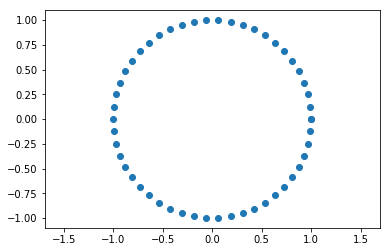

In [25]:
plt.figure()
plt.plot(path[:, 0], path[:, 1], 'o')
plt.axis('equal')
plt.show()

In [108]:
# Geometry
y_int = 0
direction = 'left'

# initial velocity
v = np.array([0.0, 0.8])
T = 2 * np.pi * r / v
pos = np.array([0, -1])


# Diretion settings
if direction == 'right':
    v_end = np.array([1.0, 0.])
    a_v = - np.linalg.norm(v) / r # sign
    phi_0 = np.pi 
    r = 1.0

if direction == 'left':
    v_end = np.array([-1.0, 0.])
    a_v = np.linalg.norm(v) / r # sign
    phi_0 = 0
    r = 1.5

# Add random-ness to direction
r = r + np.random.random() * 0.2
v = v + np.random.random() * 0.2

num_steps = 0

path = [pos]

while pos[1] < y_int:
    pos = pos + dt * v
    path.append(pos)
    num_steps += 1
    
if direction == 'right' or direction == 'left':
    t = 0
    while abs(v[1] - v_end[1]) > 0.1:
    # for i in range(50):
        vx = -a_v * r * np.sin(phi_0 + a_v * t)
        vy = a_v * r * np.cos(phi_0 + a_v * t)
        v = np.array([vx, vy])
        pos = pos + v * dt

        t = t + dt
        path.append(pos)
        num_steps += 1
    
while num_steps < max_steps:
    pos = pos + v * dt
    path.append(pos)
    num_steps += 1
    
path = np.array(path)

/Users/priyakasimbeg/anaconda3/envs/asl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


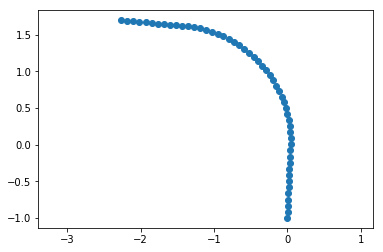

In [109]:
plt.figure()
plt.plot(path[:, 0], path[:, 1], 'o')
plt.axis('equal')
plt.show()